In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install git+https://github.com/eigenP/kymograph-py.git

  Cloning https://github.com/eigenP/kymograph-py.git to c:\users\panoi\appdata\local\temp\pip-req-build-rg1hnch3
  Resolved https://github.com/eigenP/kymograph-py.git to commit dabe1cfdb9b8b3537eae63856fc461b9b0104060
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for python-kymograph: filename=python_kymograph-0.1.0-py3-none-any.whl size=7525 sha256=f9b6ab52e72f61a744cbdfab0715d595a050e410d3cfef346472eb75d05ba3cd
  Stored in directory: C:\Users\panoi\AppData\Local\Temp\pip-ephem-wheel-cache-zt_akga0\wheels\5b\69\58\870433dd3e054810c53404f8ec536e6b0bbfcad0fa1873acf2
Successfully built python-kymograph


  Running command git clone --filter=blob:none --quiet https://github.com/eigenP/kymograph-py.git 'C:\Users\panoi\AppData\Local\Temp\pip-req-build-rg1hnch3'


In [3]:
from kymograph_py import make_kymograph, process_labels


In [4]:
import napari

viewer = napari.Viewer()

In [5]:
## From File > Open Sample > ....
# or any other image with T Y X dims

# Load sample data from skimage.data
from skimage.data import cells3d

# Assign the raw image to img_raw
img_raw = cells3d()
# Separate membranes and nuclei from the raw image
membranes = img_raw[:,0,...]
nuclei = img_raw[:,1,...]

# Set the image of interest to the nuclei
image = nuclei
# Add the image to the viewer with a name
viewer.add_image(image, name = 'Image')
# viewer.add_image(membranes, name = 'Membranes')

image_data = viewer.layers['Image'].data

In [6]:
# Check if a layer named "ROI_labels" already exists
if "ROI_labels" not in [layer.name for layer in viewer.layers]:
    # Create a new labels layer named "ROI_labels"
    viewer.add_labels(data=np.zeros_like(image_data), name="ROI_labels")
else:
    print("Layer 'ROI_labels' already exists.")

##  Annotate the Regions of Interest (ROIs)!

Use the `ROI_labels` layer - use the brush tool, and don't worry about being very precise - the centroid of each annotation will be used.

Also, you dont need to annotate every time frame, there is an interpolation step that takes care of the un-annotated frames - but adjust as needed for the bigger jumps between frames!

In [ ]:
assert False # just to make sure annotation above is performed

In [7]:
# Select the shapes layer and access the data
ROI_data = viewer.layers['ROI_labels'].data
# ROI_data = np.squeeze(ROI_layer.data)

In [8]:
centroids_ = process_labels(ROI_data)
centroids_

array([[184.89420707,  49.93828724],
       [184.32245718,  50.06826409],
       [183.78702174,  50.18566927],
       [183.28705527,  50.29105008],
       [182.82171232,  50.38495382],
       [182.39014742,  50.4679278 ],
       [181.9915151 ,  50.54051931],
       [181.6249699 ,  50.60327566],
       [181.28966635,  50.65674415],
       [180.98475899,  50.70147208],
       [180.70940234,  50.73800675],
       [180.46275096,  50.76689546],
       [180.24395936,  50.78868551],
       [180.05218209,  50.80392422],
       [179.88657367,  50.81315887],
       [179.74628865,  50.81693676],
       [179.63048156,  50.81580521],
       [179.53830693,  50.81031151],
       [179.4689193 ,  50.80100296],
       [179.4214732 ,  50.78842686],
       [179.39512316,  50.77313053],
       [179.38902373,  50.75566124],
       [179.40232943,  50.73656632],
       [179.43419481,  50.71639305],
       [179.48377438,  50.69568875],
       [179.5502227 ,  50.67500071],
       [179.63269429,  50.65487623],
 

In [10]:
# Add the interpolated centroids as a points layer for verification
viewer.add_points(centroids_, name='Centroids', size=5, face_color='green')


<Points layer 'Centroids' at 0x24820834b80>

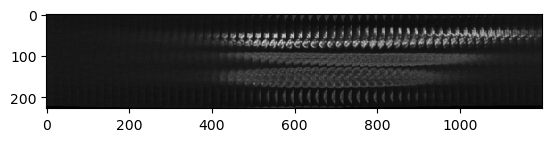

In [11]:
image = viewer.layers['Image'].data
kymo = make_kymograph(image, centroids_, width=20, height=300, skip_step=1, colorbar=False)

plt.imshow(kymo, cmap = 'gray')


Applying Drift Correction: 100%|██████████| 60/60 [00:00<00:00, 31022.96it/s]


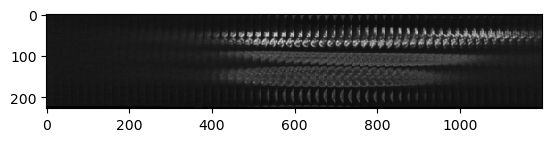

In [12]:
### Pass it through extra stabilization (drift correction)


image = viewer.layers['Image'].data
kymo = make_kymograph(image, centroids_, stabilize=True, width=20, height=300, skip_step=1, colorbar=False)

plt.imshow(kymo, cmap = 'gray')


In [13]:
viewer.add_image(kymo, name = 'Kymo', blending='additive')

<Image layer 'Kymo' at 0x2480758c910>

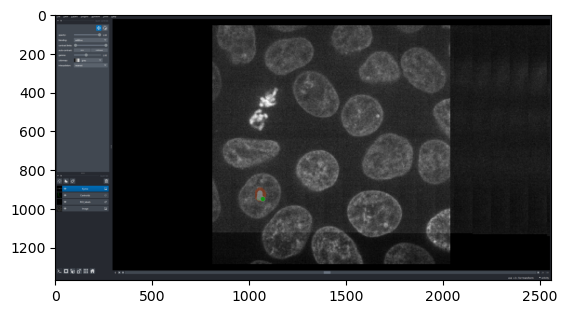

In [18]:
plt.imshow(viewer.screenshot(canvas_only=False))